# 보건 의료 데이터
## 보험료(charges) 예측하기

# 0. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/fintech-data/Revolution/main/data/insurance.csv')

In [ ]:
insurance.head()

# 1. 데이터 전처리

In [ ]:
insurance.shape

In [ ]:
insurance.info()

## 1-1. 결측치 제거

In [ ]:
# 결측치 없음
insurance.isnull().sum()

## 1-2. 이상치 탐지

In [ ]:
insurance.describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline

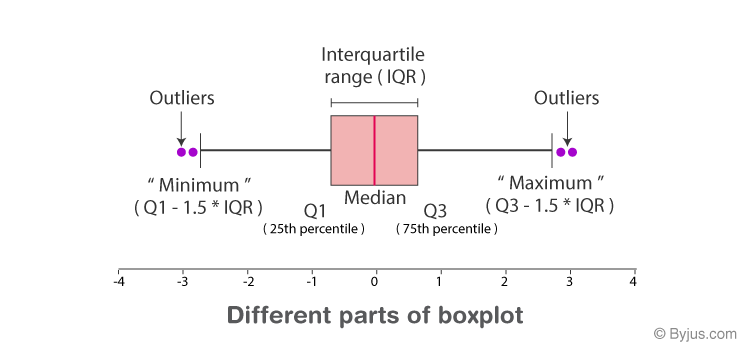

In [ ]:
bplot= sns.boxplot(data=insurance)

In [ ]:
# charges의 값이 너무 커서 나머지 값들이 제대로 보이지 않으므로 하나하나 그려보자

In [ ]:
insurance.head()

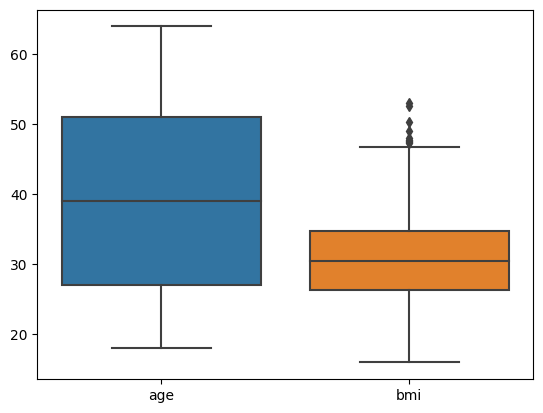

In [ ]:
bplot= sns.boxplot(data= insurance[['age', 'bmi']])

In [ ]:
bplot= sns.boxplot(data= insurance[['children']])

In [ ]:
bplot= sns.boxplot(data= insurance[['charges']])

# 2. 탐색적 자료분석 (EDA)

## 2-1 범주형

In [ ]:
insurance.head()

In [ ]:
insurance['sex'].value_counts().plot.bar()

In [ ]:
insurance['children'].value_counts().plot.bar()

In [ ]:
insurance['smoker'].value_counts().plot.bar()

In [ ]:
insurance['region'].value_counts().plot.bar()

## 2-2 범주형 변수와 y와의 관계
- 범주형 & 연속형 : bar plot, box plot 등

<Axes: xlabel='sex', ylabel='charges'>

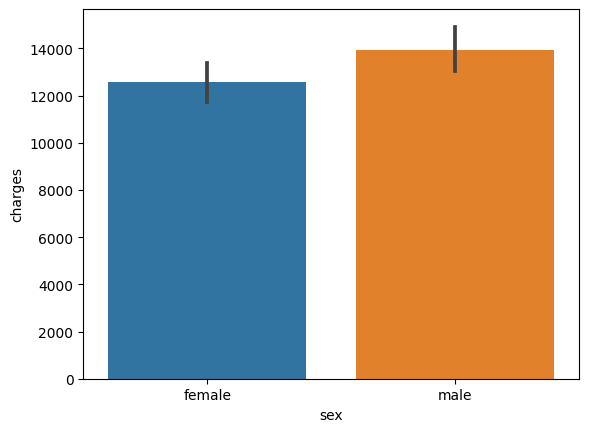

In [ ]:
# 남성일수록 보험료가 비싸다
sns.barplot(x='sex', y='charges', data=insurance)

<Axes: xlabel='children', ylabel='charges'>

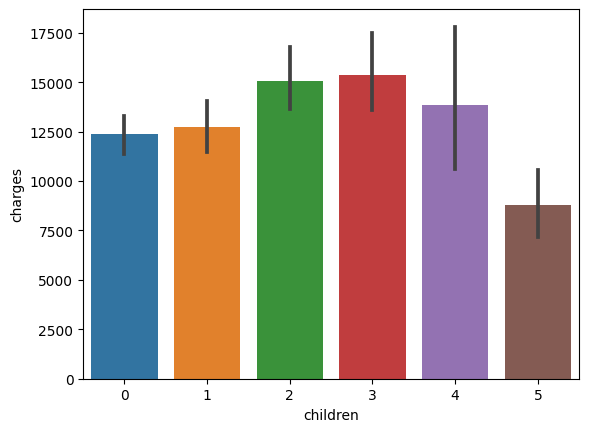

In [ ]:
# 자녀에 따른 보혐료의 차이는 미비하나 2~3명일 경우 보험료가 가장 비싸다.
sns.barplot(x='children', y='charges', data=insurance)

# Q. 5명일 때 특히 보험료가 작게 나온다 -> 이는 데이터 자체가 작아서이다. 위의 bar plot으로도 확인 가능

In [ ]:
#자녀수가 4, 5일 때 데이터가 적다.
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

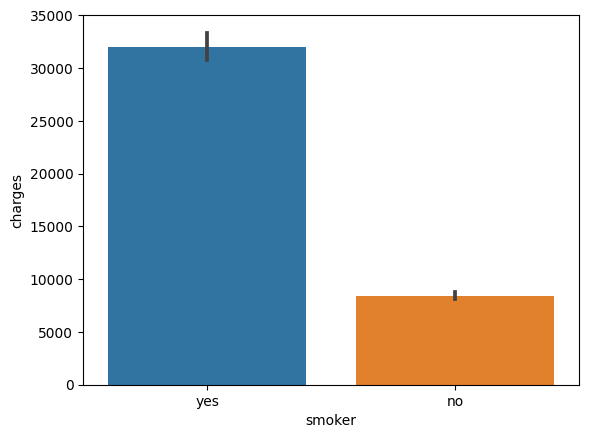

In [ ]:
# 담배를 필경우 피지 않을 경우보다 보험료가 3배 이상 비싸다 => 주요 변수
sns.barplot(x='smoker', y='charges', data=insurance)

<Axes: xlabel='region', ylabel='charges'>

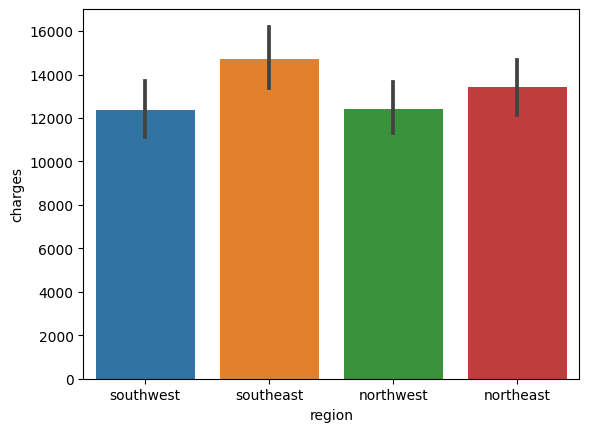

In [ ]:
# region에 의한 차이는 미비하다 남동쪽이 다른 지역에 비해 보험료가 비싸다
sns.barplot(x='region', y='charges', data=insurance)

## 가설 1. 남동부 지역의 BMI가 더 높다.
- 확인 : boxplot을 그려보자

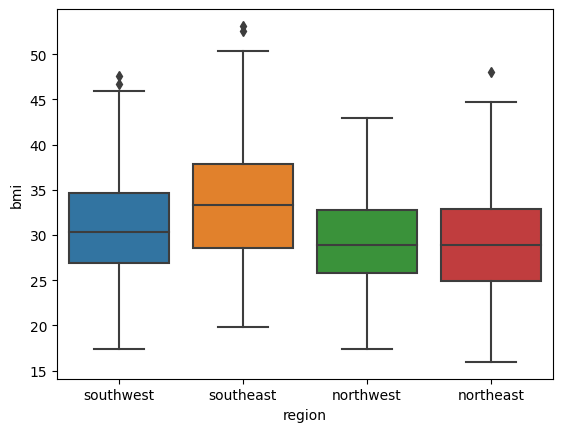

In [ ]:
bplot= sns.boxplot(y = 'bmi', x= 'region', data = insurance)

# 실제로 남동쪽의 BMI가 더 높은것을 확인 할 수있다.
# 가설 성립!

## 2-3 연속형

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 20대가 가장 많다
sns.distplot(insurance['age'])

In [ ]:
# 정규분포 모형을 띄며 bmi 30~35 사이가 가장 많다.
sns.distplot(insurance['bmi'])

In [ ]:
# 종속변수 y : 오른쪽으로 꼬리가 길다 -> log 변환
sns.distplot(insurance['charges'])

In [ ]:
import numpy as np

<Axes: xlabel='charges', ylabel='Density'>

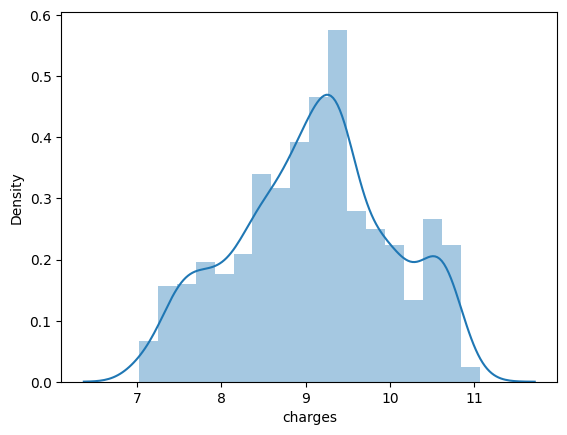

In [ ]:
# 종속변수 y : 오른쪽으로 꼬리가 길다 -> log 변환 -> 꼬리가 사라짐
sns.distplot(np.log(insurance['charges']))

In [ ]:
# y -> log(y)를 사용하여 회귀분석

# 2-4 연속형 & 종속변수와의 관계
- 연속형 & 연속형 : 상관관계

In [ ]:
corr = insurance.corr(method = 'pearson')
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Greens')

# 종속변수(보험료)와의 상관관계의 경우, 나이 > BMI 순으로 상관관계가 높은 것을 알 수 있다

In [ ]:
# pair plot
sns.pairplot(insurance)
plt.show()
plt.close()

# 3. 모델링

## 3-1. 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
insurance_data = pd.get_dummies(insurance)

In [ ]:
insurance_data.columns

In [ ]:
X= insurance_data[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = np.log(insurance_data['charges'])

In [ ]:
from numpy import log as ln
x=ln(10) # 파이썬에서 log -> ln로그로 돼 있어서, ln을 지수 log10으로 변환하는 것이 필요

In [ ]:
insurance_data["sex_male"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, #독립 변수
                                                    y, #종속 변수
                                                    test_size=0.30,  #검증 30%
                                                    random_state=30)


In [ ]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# train의 R^2 값
lr.score(X_train, y_train)

0.774202171717437

In [ ]:
# test의 R^2 값
lr.score(X_test, y_test)

0.7483323184442225

In [ ]:
y_predict = lr.predict(X_test)

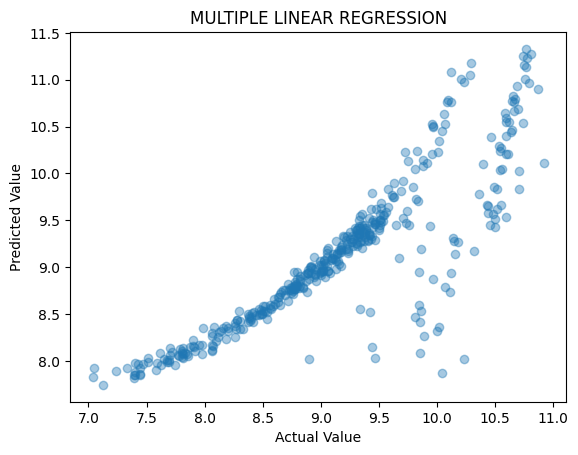

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

Log(y)대신에 y를 쓴 회귀모형

In [ ]:
y1 = insurance_data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, #독립 변수
                                                    y1, #종속 변수
                                                    test_size=0.30,  #검증 30%
                                                    random_state=30)

In [ ]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()
lr.fit(X_train, y1_train)

LinearRegression()

In [ ]:
# train의 R^2 값
lr.score(X_train, y1_train)

0.7449481055930618

In [ ]:
lr.score(X_test, y1_test)

0.7634339062453543

+ 근접회귀 모델

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
print(knr.score(X_test, y_test))

0.36441134961068433


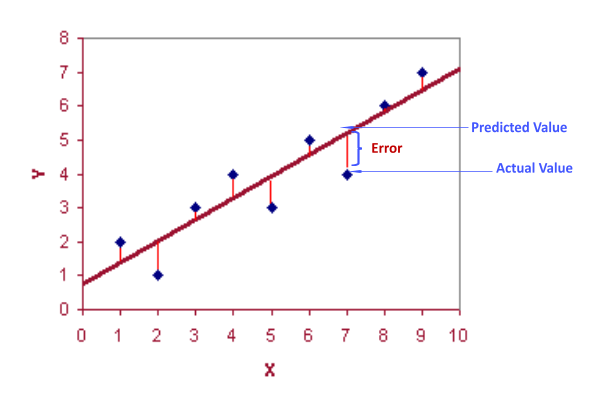

### 모델 평가 지표 : RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.4442231112827137

In [ ]:
# 그림을 그려보니 Quadratic으로 나온다 -> 선형이 아닌 비선형을 이용해야함.

### 3-3-1. 비선형 회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
lin_reg.score(X_poly, y_train)

0.8557984123012246

In [ ]:
lin_reg.intercept_, lin_reg.coef_
X_test_poly = poly_features.transform(X_test)
y_predict = lin_reg.predict(X_test_poly)

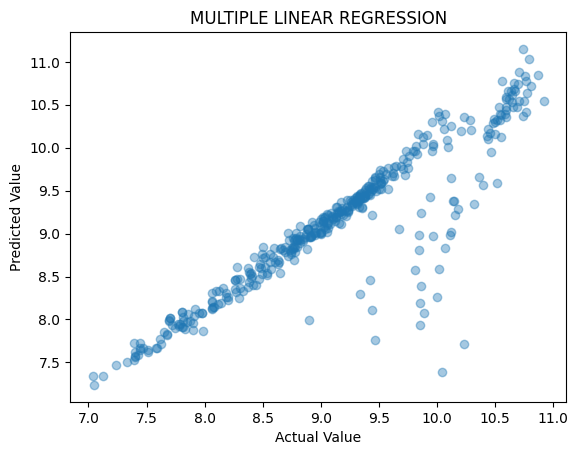

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# 비선형성을 활용하니 RMSE가 0.37로 매우 작다

0.39306837985141635

## 3-2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor() # 분류 트리(default) 객체 생성
rf.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [ ]:
y_predict = rf.predict(X = X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 0.4로 낮아지는 것을 볼 수있다

0.4238932248074305

## 3-3. SVM

In [ ]:
from sklearn.svm import SVR #회귀는 SVR

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_predict = svr.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 0.70으로 매우 커졌다.

0.47472219147455047

In [ ]:
# RMSE가 0.47로 커졌다.

In [ ]:
from sklearn.svm import SVR #회귀는 SVR

svr = SVR(kernel='poly', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(kernel='poly')

In [ ]:
y_predict = svr.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 0.70으로 매우 커졌다. ->

0.6957897707660744

## 3-4. 앙상블

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
voting_model = VotingRegressor(
    estimators=[('lr',lin_reg),('rf',rf),('svc',svr)], # 3개의 약한 학습기
    n_jobs = 1
)

In [ ]:
# 앙상블 모델 학습
voting_model.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('svc', SVR(kernel='linear'))],
                n_jobs=1)

In [ ]:
ens_predict = voting_model.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, ens_predict)**0.5
RMSE
# RMSE가 0.41이다.

0.4111668891829837